In [5]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.signal
from astropy import units as u

In [11]:
# this path leads to a folder with subfolders, each subfolder is a fits file for a galaxy. 
# These fits files are the ones you downloaded using wget 
# e.g. "spec-4802-55652-0408.fits" would be contained in one of my subfolders

path = '/Volumes/quinn_casey/eboss/total_bins/spectra_and_imaging/lmagn_speclist_derive_by_bin_mark_groves_txt_flies/dflmagn_left_fits1'

In [9]:
# This is a very basic plotting/labeling function, the real plotting technique is in 
# the following cell. The important line in this function is the 'ax.step' line. 
# the other things are time savers for plotting the title and labels

def smooth_spec(lamb, flux, fluxhat):
    
    #Smoothed spectra
    plt.style.use('grayscale')
    f, ax = plt.subplots() 
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title('P:'+str(plate)+'  M:'+str(mjd)+'  F:'+str(fiber)+ '  Z='+str(z))
    ax.step(lamb[np.where(snr > 0)], fluxhat[np.where(snr > 0)], c='k')
    
    return

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


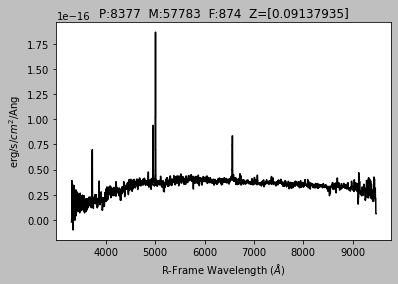

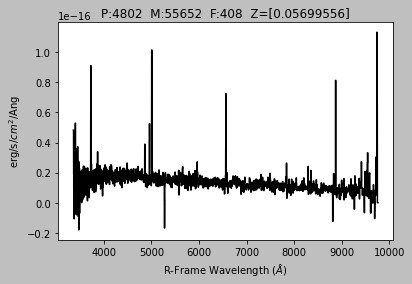

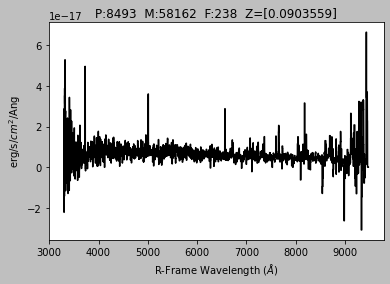

In [10]:
# this is the big time-saver, instead of reading-in each fits file, I am creating an empty
# list then filling it with the fits files contained in my path. Then I loop over each 
# fits file and open it with fits.open

f1 = []
for root, directories, files in os.walk(path, topdown=False):
    for name in files:
        try:
            f1.append(fits.open(os.path.join(root, name)))
        except:
            pass
        
# Here is where I read in data from the now-filled dictionary (f1) 
# and formulate it to be plotted as a spectra.


for x in f1:
    z = x[2].data['z']
    # lamb (loglam) is wavelength and it is over (1+z) to get to restframe as I'm sure you know
    lamb = (10**x[1].data['loglam']* u.AA)/(1+z)
    flux = x[1].data['flux']
    # err is flux error worked backwards from inverse variance ("ivar")
    err = np.sqrt(1/x[1].data['ivar'])
    
    # plate, mjd, fiber
    plate = x[0].header['PLATEID']
    mjd = x[0].header['MJD']
    fiber = x[0].header['FIBERID']
    
    # Signal to noise ratio needed for the "ax.step" line in the previous cell. 
    # it is important to have snr > 0 or else the spectra gets very strange
    snr = flux/err
    # simply getting flux in the correct units
    flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
    # applying the median filter with a kernel size (pixel size) of 5 to the flux and renaming it "fluxhat"
    # this is the "smoothing" portion of the code. 
    fluxhat = scipy.signal.medfilt(flux, kernel_size=5)

    smooth_spec(lamb, flux, fluxhat)
    
    # output is the smoothed spectra of all the galaxies within my path (only 3 here)